In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/sample_data/KBO increased data_over 30 AB.csv')

In [5]:
# train set과 test set 분리
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

## Test variable Hyperparameters

In [6]:
R = train_set["R"].to_numpy()
R = R.reshape(-1, 1)

RBI = train_set["RBI"].to_numpy()
RBI = RBI.reshape(-1, 1)

R_AND_RBI = np.concatenate((R, RBI), axis=1)

y = train_set["WAR"].copy().to_numpy()
y = y.reshape(-1, 1)

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


full_pipeline = Pipeline([
    ("StandardScaler", StandardScaler()),
    ("SVR", SVR(kernel='poly')),
    ])

param_distribs = {'SVR__degree': randint(low=2, high=10),
                  'SVR__C': np.random.uniform(0.01, 0.1, size=30),
                  'SVR__epsilon': np.random.uniform(0.01, 0.1, size=30),
                  }

rnd_search = RandomizedSearchCV(full_pipeline, param_distributions=param_distribs, n_iter=40, cv=3,
                                 scoring='neg_mean_squared_error', random_state=42)

rnd_search.fit(R_AND_RBI, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('StandardScaler',
                                              StandardScaler()),
                                             ('SVR', SVR(kernel='poly'))]),
                   n_iter=40,
                   param_distributions={'SVR__C': array([0.07132936, 0.04544452, 0.01439736, 0.07381014, 0.044307  ,
       0.02864992, 0.06640625, 0.08431675, 0.02286932, 0.06104146,
       0.02408799, 0.03480812, 0.06340932, 0.03197721, 0.02284775,
       0.04715268, 0.01269019, 0.0...
                                        'SVR__epsilon': array([0.05313011, 0.04294331, 0.08962813, 0.05860751, 0.09754286,
       0.09611486, 0.06995433, 0.02140139, 0.0193737 , 0.04818103,
       0.0866615 , 0.09086015, 0.01111447, 0.0597217 , 0.05519255,
       0.07188564, 0.06598322, 0.04598288, 0.058452  , 0.05922114,
       0.02146527, 0.02098048, 0.02687264, 0.07498719, 0.04583874,
       0.04098681, 0.0907138 , 0.09337075, 0.07252403, 0.07136792])},
                   random_state=42, scoring='neg_mean_squared_error')

In [8]:
rnd_search.best_params_

{'SVR__C': 0.012888951526111539,
 'SVR__degree': 3,
 'SVR__epsilon': 0.07498719388057506}

In [9]:
final_candidate = rnd_search.best_estimator_

In [10]:
rnd_search.best_score_

-1.4594779231911372

In [11]:
R_test = test_set["R"].to_numpy()
R_test = R_test.reshape(-1, 1)

RBI_test = test_set["RBI"].to_numpy()
RBI_test = RBI_test.reshape(-1, 1)

R_AND_RBI_test = np.concatenate((R_test, RBI_test), axis=1)

In [12]:
from sklearn.metrics import root_mean_squared_error

y_test = test_set["WAR"].copy().to_numpy()
y_test = y_test.reshape(-1, 1)

final_prediction = final_candidate.predict(R_AND_RBI_test)
final_rmse = root_mean_squared_error(y_test, final_prediction)
final_rmse

0.8336328543270034

In [14]:
# 황재균 WAR(-0.30) 예측
hwang = final_candidate.predict([[60, 58]])
hwang

array([0.76806033])

In [15]:
# 로하스 WAR(6.50) 예측
Rojas = final_candidate.predict([[108, 112]])
Rojas

array([6.3969748])

In [16]:
# 김도영 WAR(8.32) 예측
DO_YEONG = final_candidate.predict([[143, 109]])
DO_YEONG

array([12.15909261])

In [17]:
# 최정 WAR(4.55) 예측
Choi_Jung = final_candidate.predict([[93, 107]])
Choi_Jung

array([4.18641162])

In [18]:
# 강백호 WAR(2.12) 예측
BaekHo = final_candidate.predict([[92, 96]])
BaekHo

array([3.27748484])

In [19]:
# 모델 저장
import joblib
joblib.dump(final_candidate, "rnd_best_hyperparameter_svm_poly_reg_with_R_and_RBI_model.pkl")

['rnd_best_hyperparameter_svm_poly_reg_with_R_and_RBI_model.pkl']

## Decision Tree Regression

In [20]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(R_AND_RBI, y)

DecisionTreeRegressor(random_state=42)

In [26]:
tree_reg.get_depth()

16

In [27]:
# restrict depth
tree_reg = DecisionTreeRegressor(max_depth=10, random_state=42)
tree_reg.fit(R_AND_RBI, y)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [29]:
root_mean_squared_error(y, tree_reg.predict(R_AND_RBI))

0.25026101140690965

In [30]:
root_mean_squared_error(y_test, tree_reg.predict(R_AND_RBI_test))

1.0973988678174647

In [31]:
# Solve overfitting
tree_reg = DecisionTreeRegressor(max_depth=8, random_state=42)
tree_reg.fit(R_AND_RBI, y)

DecisionTreeRegressor(max_depth=8, random_state=42)

In [32]:
root_mean_squared_error(y, tree_reg.predict(R_AND_RBI))

0.3993717474468245

In [33]:
root_mean_squared_error(y_test, tree_reg.predict(R_AND_RBI_test))

1.0512890391834917

In [34]:
# Solve Overfitting
tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_reg.fit(R_AND_RBI, y)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [35]:
root_mean_squared_error(y, tree_reg.predict(R_AND_RBI))

0.6630730679221726

In [36]:
root_mean_squared_error(y_test, tree_reg.predict(R_AND_RBI_test))

0.7934646554039457

In [37]:
# 황재균 WAR(-0.30) 예측
hwang = tree_reg.predict([[60, 58]])
hwang

array([1.3344])

In [38]:
# 로하스 WAR(6.50) 예측
Rojas = tree_reg.predict([[108, 112]])
Rojas

array([6.5])

In [39]:
# 김도영 WAR(8.32) 예측
DO_YEONG = tree_reg.predict([[143, 109]])
DO_YEONG

array([8.32])

In [40]:
# 최정 WAR(4.55) 예측
Choi_Jung = tree_reg.predict([[93, 107]])
Choi_Jung

array([4.5025])

In [41]:
# 강백호 WAR(2.12) 예측
BaekHo = tree_reg.predict([[92, 96]])
BaekHo

array([2.99166667])

In [42]:
# Save model
import joblib
joblib.dump(tree_reg, "tree_reg_with_R_and_RBI_model.pkl")

['tree_reg_with_R_and_RBI_model.pkl']

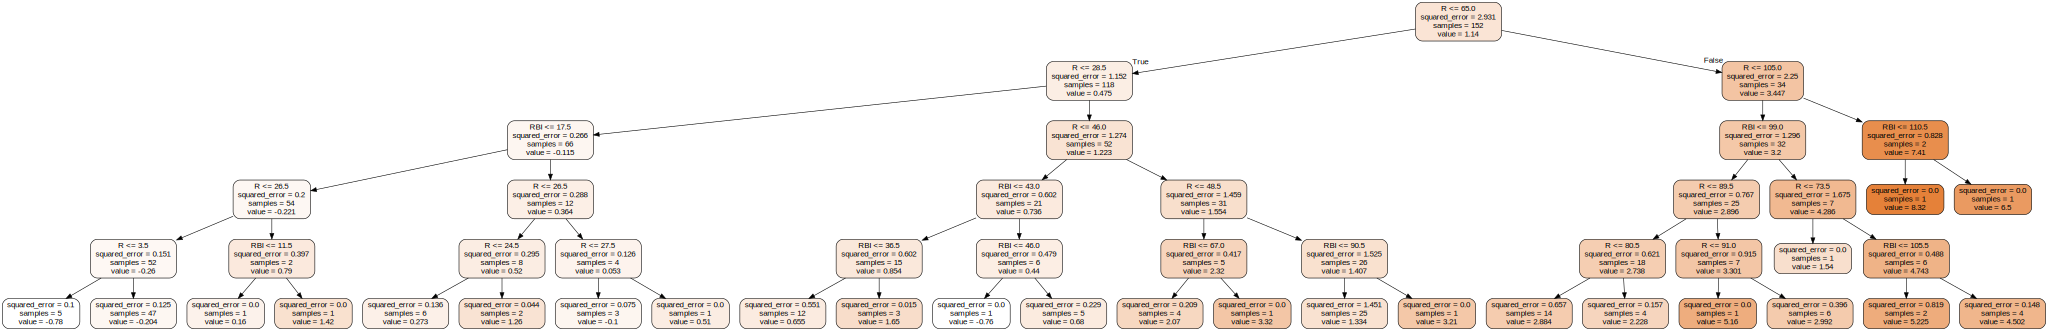

In [43]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_reg,
    out_file='R_AND_RBI.dot',
    feature_names=['R', 'RBI'],
    rounded=True,
    filled=True
)

from graphviz import Source

Source.from_file('R_AND_RBI.dot')